In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/My\ Drive/


"10330521039_Prem Prakash_Mooc's.pdf"
'Accenture_AdmitCard (Responses) (1).gsheet'
'Accenture_AdmitCard (Responses).gsheet'
 bn_bd.zip
'Colab Notebooks'
'Consent- DS Full Time 2024 (1).gdoc'
'Consent- DS Full Time 2024.gdoc'
'Contact Information.gform'
'Copy of Consent- DS Full Time 2024.gdoc'
'Copy of Untitled form.gform'
'Correction in percentage.gform'
 DataScience_Branch.gsheet
 ECG_final_images.zip
 ECG_Image_data39.zip
 ECG_Image_data_modified_data.zip
 ECG_INCEPTION_NET_DATA.zip
'IMG_20240101_213127_931 (1).jpg'
 IMG_20240529_161835.jpg
 Landslides.csv
 LTIMINDTREE.gsheet
'mit_datasetimage1 (2) (1).zip'
 MIT_final_images.zip
'NDA- DS Full Time 2024 (1).gdoc'
'NDA- DS Full Time 2024.gdoc'
'Prem Prakash Certificate - Guidelines Refresher V2.2024 (1) (1).pdf'
'Prem Prakash Certificate - Guidelines Refresher V2.2024 (1).pdf'
'Prem_Resume (2) (1).pdf'
'Prem_Resume (2).pdf'
 Prem_Resume39.pdf
 RSVP.gform
 Sabudh_Asses_1
 Screenshot_2024-07-16-21-16-33-46_3d9111e2d3171bf4882369f490c087

In [4]:
!unzip '/content/drive/My Drive/bn_bd.zip' -d /content/


Archive:  /content/drive/My Drive/bn_bd.zip
  inflating: /content/line_index.tsv  
  inflating: /content/wavs/ban_00737_00006753614.wav  
  inflating: /content/wavs/ban_00737_00008514221.wav  
  inflating: /content/wavs/ban_00737_00012222450.wav  
  inflating: /content/wavs/ban_00737_00012499574.wav  
  inflating: /content/wavs/ban_00737_00015581920.wav  
  inflating: /content/wavs/ban_00737_00023461747.wav  
  inflating: /content/wavs/ban_00737_00025124609.wav  
  inflating: /content/wavs/ban_00737_00028634754.wav  
  inflating: /content/wavs/ban_00737_00032972394.wav  
  inflating: /content/wavs/ban_00737_00033903274.wav  
  inflating: /content/wavs/ban_00737_00035050432.wav  
  inflating: /content/wavs/ban_00737_00047790608.wav  
  inflating: /content/wavs/ban_00737_00049370351.wav  
  inflating: /content/wavs/ban_00737_00054222068.wav  
  inflating: /content/wavs/ban_00737_00054928914.wav  
  inflating: /content/wavs/ban_00737_00056479596.wav  
  inflating: /content/wavs/ban_00737_

In [7]:
# List the contents of the root directory after unzipping
!ls /content/


drive  line_index.tsv  sample_data  wavs


In [1]:
# Import necessary libraries for text and audio analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa  # For audio processing
import librosa.display  # For visualizing audio
import numpy as np
from wordcloud import WordCloud  # For visualizing frequent words


In [8]:
# Import necessary libraries
import pandas as pd

# Load the .tsv file
tsv_file_path = '/content/line_index.tsv'
df = pd.read_csv(tsv_file_path, sep='\t')

# Display the first few rows to understand the structure
df.head()


,ban_00737_00012222450,এইচআর টেক্সটাইল বাংলাদেশের ভেতরে একাধিক আউটলেটের মাধ্যমে শাড়ি বাচ্চাদের পোশাক মহিলাদের পোশাক এবং অন্যান্য টেক্সটাইল পণ্য উৎপাদন ও বিপণন করে
0,ban_00737_00015581920,স্ট্যান্ডার্ড ব্যাংক এ ইসলামী ব্যাংকিং এর সুবি...
1,ban_00737_00028634754,লাফার্জ সুরমা সিমেন্ট সর্বাধিক ব্যবহৃত সিমেন্ট...
2,ban_00737_00035050432,পিপলস ইন্স্যুরেন্স অব চায়না ছেষট্টি বছর আগে ব্...
3,ban_00737_00068052117,বয়গেস একটি ইন্ডাস্ট্রিয়াল গ্রুপ
4,ban_00737_00107291991,কেয়া ডেভেলপারস দেশের বিভিন্ন স্থানে স্থাপনা ত...


In [10]:
# Load the .tsv file
#tsv_file_path = '/content/line_index.tsv'

# Load the data into a pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t', header=None, names=['filename', 'bengali_text'])

# Display the first few rows
df.head()


,filename,bengali_text
0,ban_00737_00012222450,এইচআর টেক্সটাইল বাংলাদেশের ভেতরে একাধিক আউটলেট...
1,ban_00737_00015581920,স্ট্যান্ডার্ড ব্যাংক এ ইসলামী ব্যাংকিং এর সুবি...
2,ban_00737_00028634754,লাফার্জ সুরমা সিমেন্ট সর্বাধিক ব্যবহৃত সিমেন্ট...
3,ban_00737_00035050432,পিপলস ইন্স্যুরেন্স অব চায়না ছেষট্টি বছর আগে ব্...
4,ban_00737_00068052117,বয়গেস একটি ইন্ডাস্ট্রিয়াল গ্রুপ


In [11]:
# Check the first few rows of the dataframe to inspect the filenames and text data
df['filename'] = df['filename'] + '.wav'  # Add the '.wav' extension to the filenames
df.head()


,filename,bengali_text
0,ban_00737_00012222450.wav,এইচআর টেক্সটাইল বাংলাদেশের ভেতরে একাধিক আউটলেট...
1,ban_00737_00015581920.wav,স্ট্যান্ডার্ড ব্যাংক এ ইসলামী ব্যাংকিং এর সুবি...
2,ban_00737_00028634754.wav,লাফার্জ সুরমা সিমেন্ট সর্বাধিক ব্যবহৃত সিমেন্ট...
3,ban_00737_00035050432.wav,পিপলস ইন্স্যুরেন্স অব চায়না ছেষট্টি বছর আগে ব্...
4,ban_00737_00068052117.wav,বয়গেস একটি ইন্ডাস্ট্রিয়াল গ্রুপ


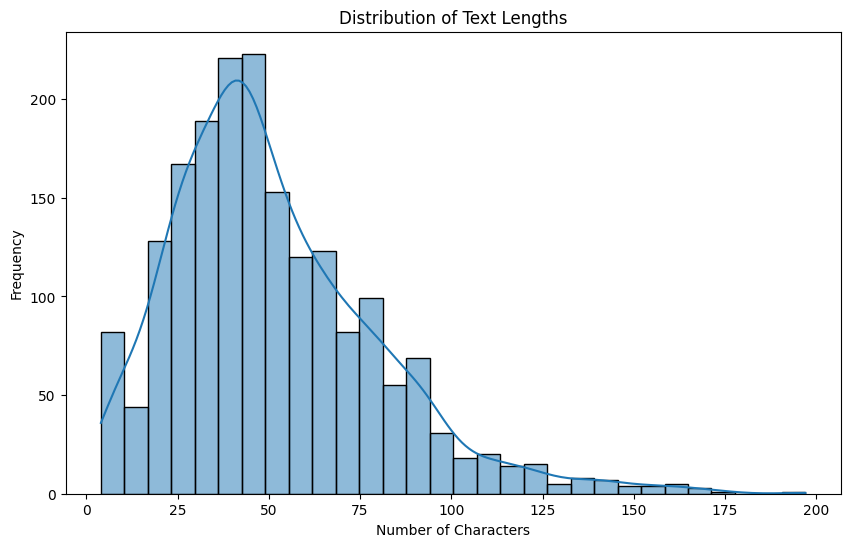

In [12]:
# Calculate text length (number of characters)
df['text_length'] = df['bengali_text'].apply(len)

# Plot the distribution of text lengths
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


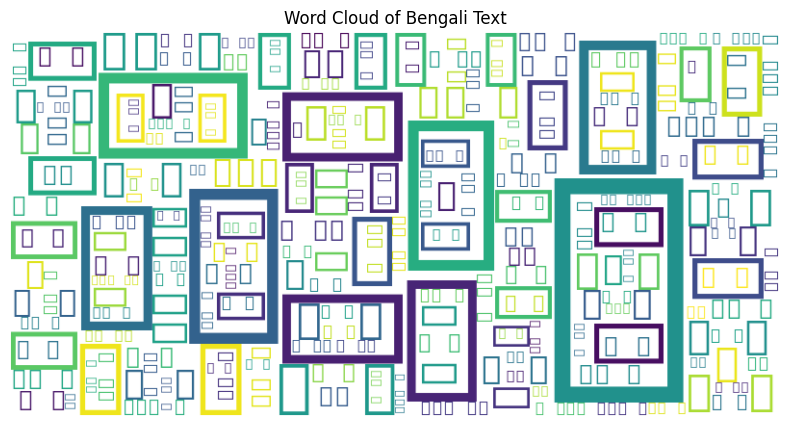

In [13]:
from wordcloud import WordCloud

# Combine all the text into a single string for the word cloud
text_data = " ".join(df['bengali_text'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bengali Text')
plt.show()


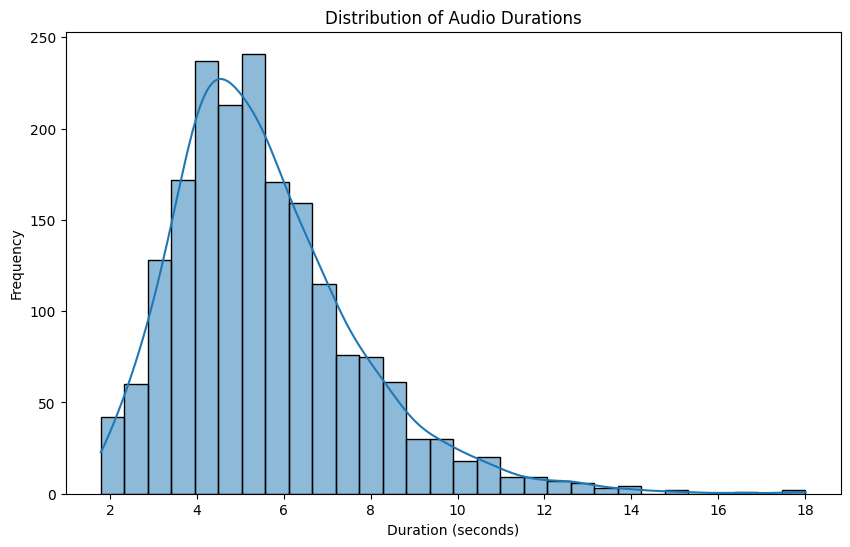

In [15]:
import librosa
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the 'wavs' folder
audio_folder = '/content/wavs/'

# List of audio files
audio_files = os.listdir(audio_folder)

# Get durations of the audio files
audio_durations = []
for audio_file in audio_files:
    file_path = os.path.join(audio_folder, audio_file)
    audio_data, sr = librosa.load(file_path)

    # Corrected way to get duration
    duration = librosa.get_duration(y=audio_data, sr=sr)

    audio_durations.append(duration)

# Assuming 'df' is your dataframe and it contains a 'filename' column matching the audio files
# Add the audio durations to the dataframe
df['audio_duration'] = audio_durations

# Plot the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(df['audio_duration'], bins=30, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


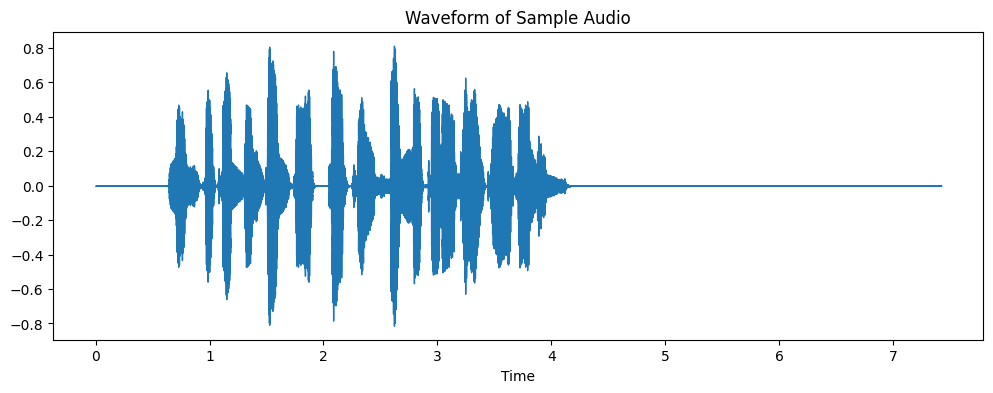

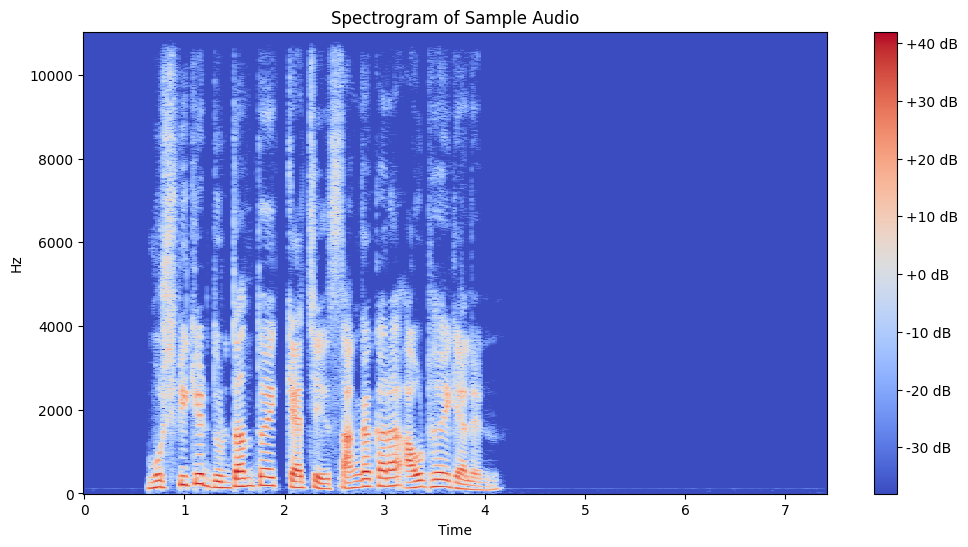

In [16]:
# Select a sample audio file
sample_audio = os.path.join(audio_folder, audio_files[0])
audio_data, sr = librosa.load(sample_audio)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.title('Waveform of Sample Audio')
plt.show()

# Compute and plot the spectrogram
X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sample Audio')
plt.show()


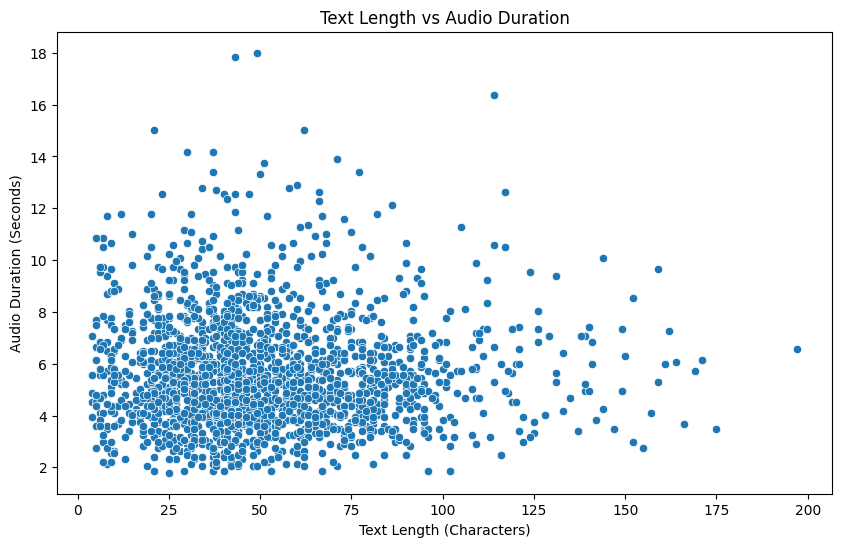

In [17]:
# Plot text length vs audio duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='audio_duration', data=df)
plt.title('Text Length vs Audio Duration')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Audio Duration (Seconds)')
plt.show()


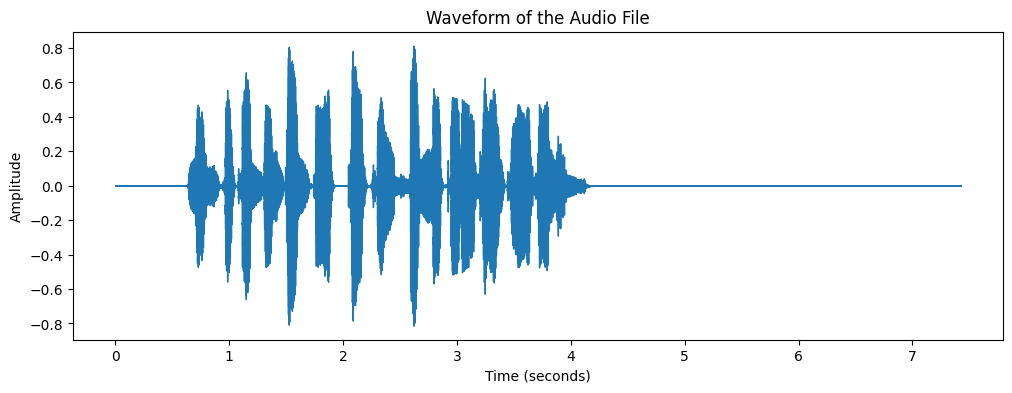

In [18]:
# Plot the waveform of the audio file
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.title('Waveform of the Audio File')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


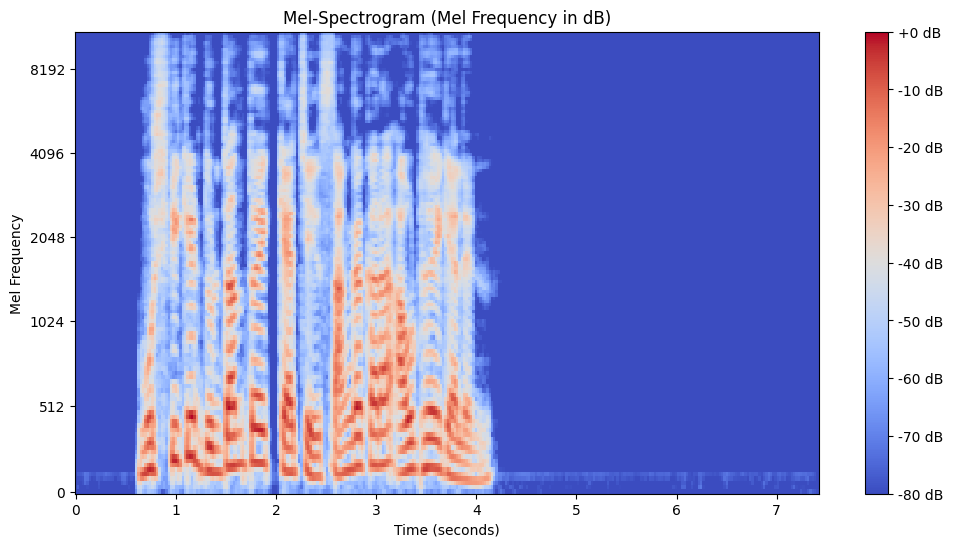

In [19]:
# Generate the Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)

# Convert to log scale (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel-spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram (Mel Frequency in dB)')
plt.xlabel('Time (seconds)')
plt.ylabel('Mel Frequency')
plt.show()


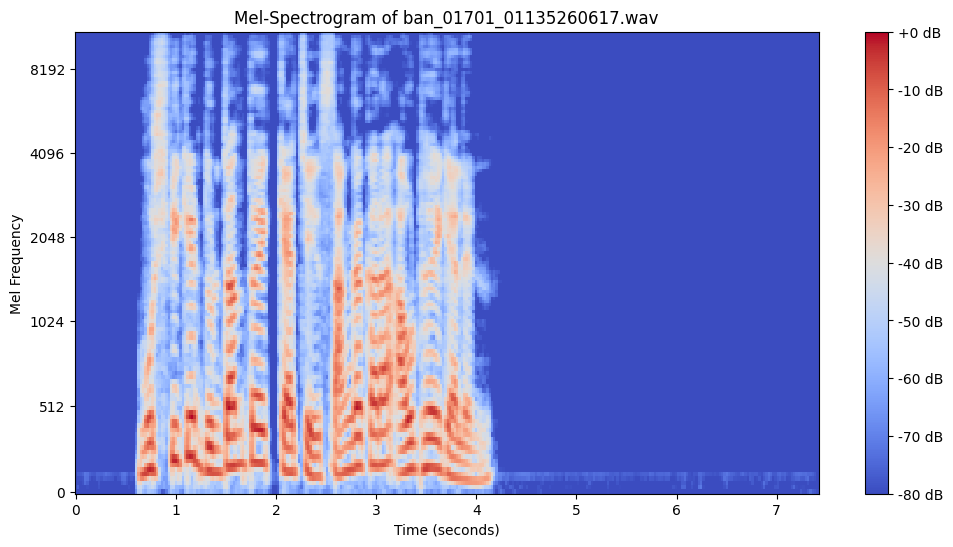

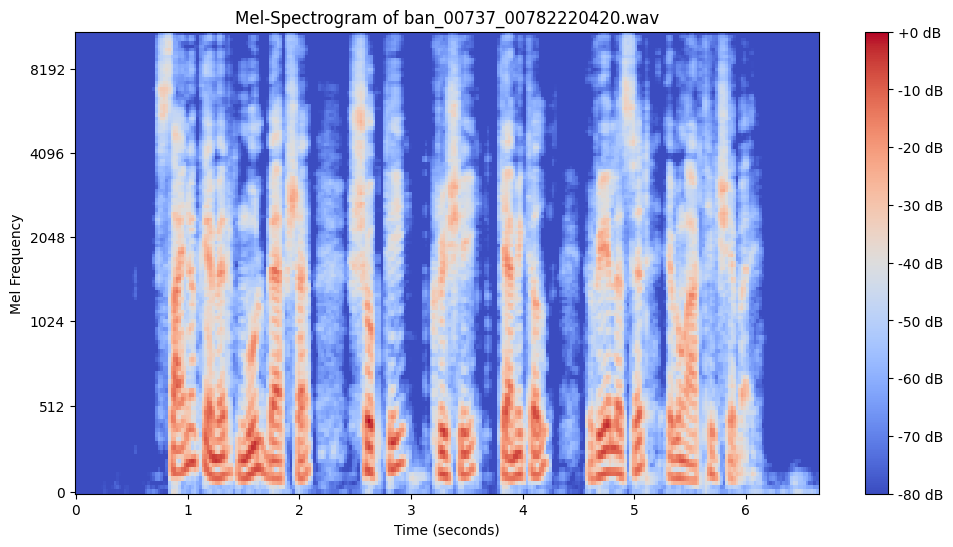

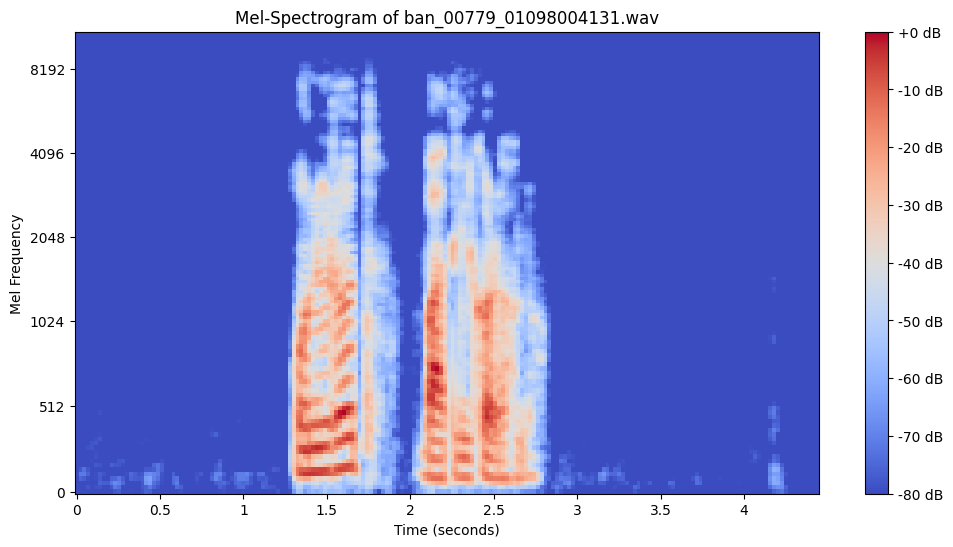

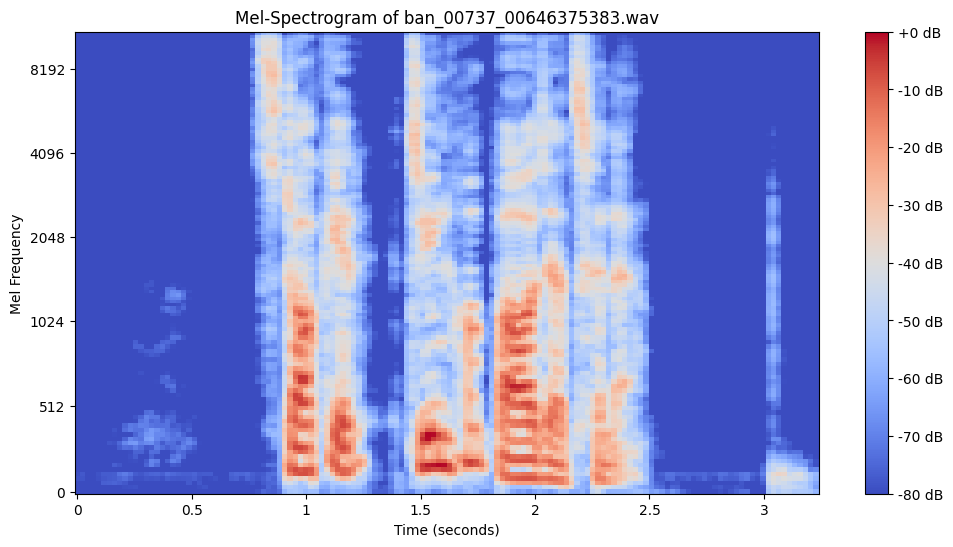

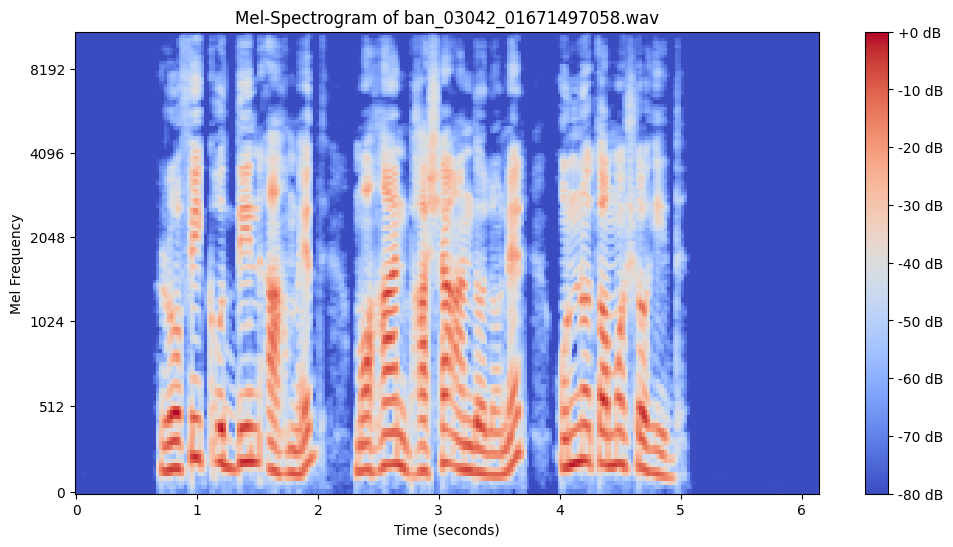

In [20]:
# Process and display spectrograms for multiple audio files
for audio_file in audio_files[:5]:  # Limiting to the first 5 files for brevity
    file_path = os.path.join(audio_folder, audio_file)
    audio_data, sr = librosa.load(file_path)

    # Generate the Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Plot the Mel-spectrogram for each audio file
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {audio_file}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mel Frequency')
    plt.show()
